In [187]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df= pd.read_csv("owid-covid-data (1).csv")

In [188]:
col = list(df.columns)
print("total column number: ", len(col))
print(col)

total column number:  65
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccina

In [189]:
df.shape

(123539, 65)

In [190]:
print(df["iso_code"].unique().shape)
print(df["location"].unique())

(233,)
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe' 'European Union' 'Faeroe Islands' 'Falkland Islands'
 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon' 'Gambia' 'Georgia'
 'Germany' 

In [191]:
df['date']= pd.to_datetime(df['date'])
#start_day='01.01.2021'
#end_day= '01.10.2021'
#start_day = pd.to_datetime(start_day)
#end_day = pd.to_datetime(end_day)
df=df[(df['date']>'2021-1-1')&(df['date']<='2021-10-1')]
df.set_index(df['date'], inplace=True)
# df.resample('m').mean()
# article how to use resample
# https://raj26kumar.medium.com/convert-daily-data-to-weekly-data-without-losing-names-of-other-column-using-python-pandas-e2aa001a3691

print(df.shape)


(60626, 65)


In [192]:
dfUSA = df[df["location"]=="United States"].resample('w').mean()
dfAF = df[df["location"]=="South Africa"].resample('w').mean()
dfJP = df[df["location"]=="Japan"].resample('w').mean()
dfUK = df[df["location"]=="United Kingdom"].resample('w').mean()
dfDE = df[df["location"]=="Germany"].resample('w').mean()
dfAU = df[df["location"]=="Australia"].resample('m').mean()
dfCA = df[df["location"]=="Canada"].resample('w').mean()
dfIT = df[df["location"]== "Italy"].resample('w').mean()
dfBR = df[df["location"]== "Brazil"].resample('w').mean()

In [193]:
dfUSA.columns

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
  

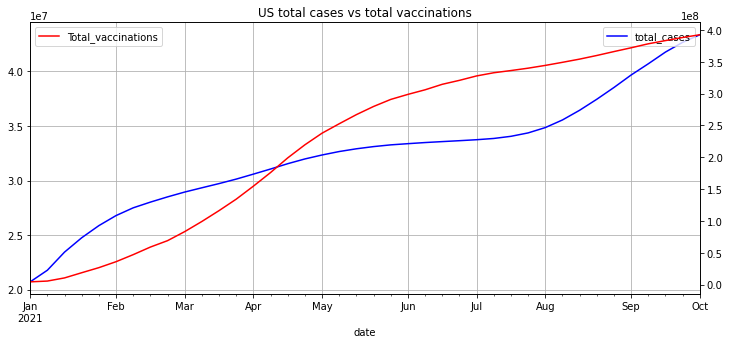

In [194]:
# US
plt.figure(figsize=(12,5))
# plt.figure(figsize=(12,5))
plt.title('US total cases vs total vaccinations')
ax1 = dfUSA.total_cases.plot(color='blue', grid=True, label='total_cases')
ax2 = dfUSA.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

In [195]:
overall_pearson_r = dfUSA.corr().loc['total_cases','total_vaccinations']
print(f"Pandas computed Pearson r (total_cases/total_vaccinations): {overall_pearson_r}")
# out: Pandas computed Pearson r: 0.2058774513561943


Pandas computed Pearson r (total_cases/total_vaccinations): 0.9258003690838964


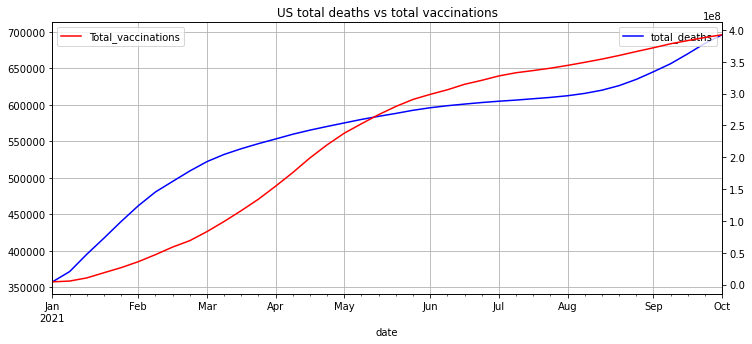

In [196]:
plt.figure(figsize=(12,5))
# plt.figure(figsize=(12,5))
plt.title('US total deaths vs total vaccinations')
ax1 = dfUSA.total_deaths.plot(color='blue', grid=True, label='total_deaths')
ax2 = dfUSA.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

In [197]:
overall_pearson_r = dfUSA.corr().loc['total_deaths','total_vaccinations']
print(f"Pandas computed Pearson r (total_deaths/total_vaccinations): {overall_pearson_r}")

Pandas computed Pearson r (total_deaths/total_vaccinations): 0.9421154531929513


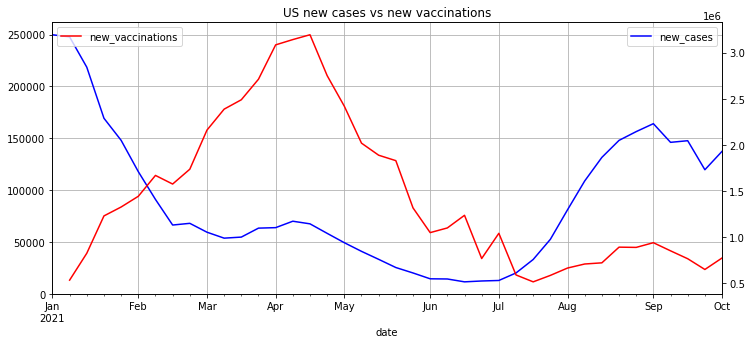

In [198]:
plt.figure(figsize=(12,5))
plt.title('US new cases vs new vaccinations')
ax1 = dfUSA.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfUSA.new_vaccinations.plot(color='red', grid=True, secondary_y=True, label='new_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()


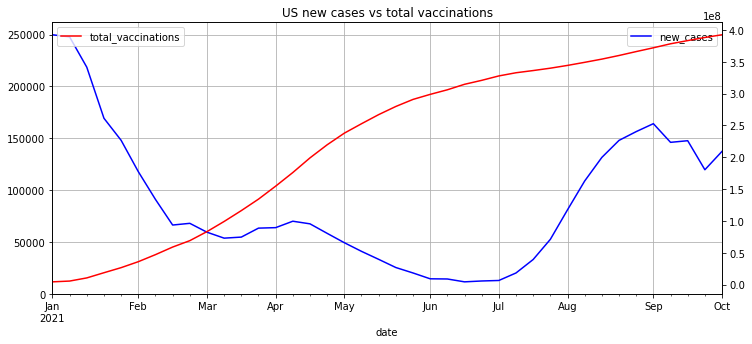

In [199]:
plt.figure(figsize=(12,5))
plt.title('US new cases vs total vaccinations')
ax1 = dfUSA.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfUSA.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

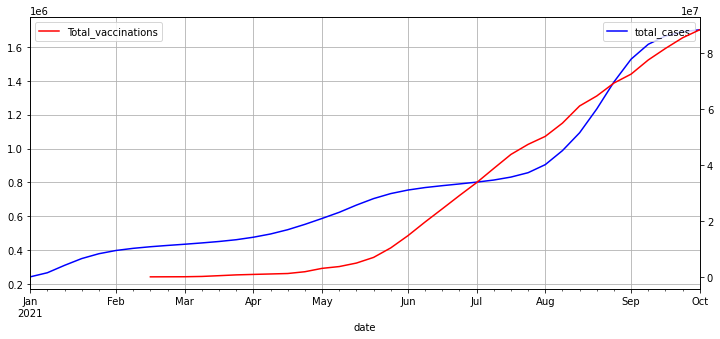

In [200]:
#Japan
plt.figure(figsize=(12,5))
# plt.figure(figsize=(12,5))
plt.xlabel('Number of requests every 10 minutes')
ax1 = dfJP.total_cases.plot(color='blue', grid=True, label='total_cases')
ax2 = dfJP.people_vaccinated.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

In [201]:
overall_pearson_r = dfJP.corr().loc['total_cases','total_vaccinations']
print(f"Pandas computed Pearson r: {overall_pearson_r}")


Pandas computed Pearson r: 0.9660762766280172


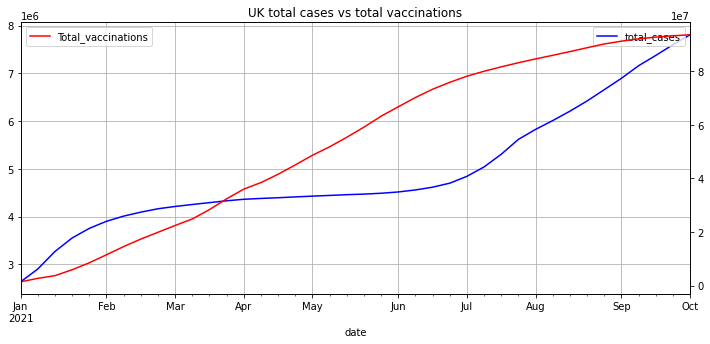

Pandas computed Pearson r (total_cases/total_vaccinations): 0.8677741030649915


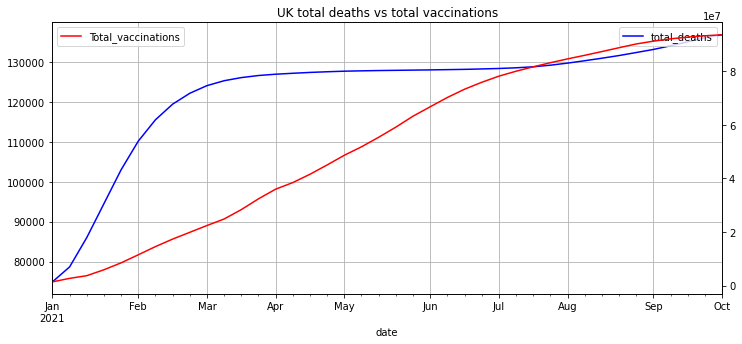

Pandas computed Pearson r (total_deaths/total_vaccinations): 0.7690964562626695


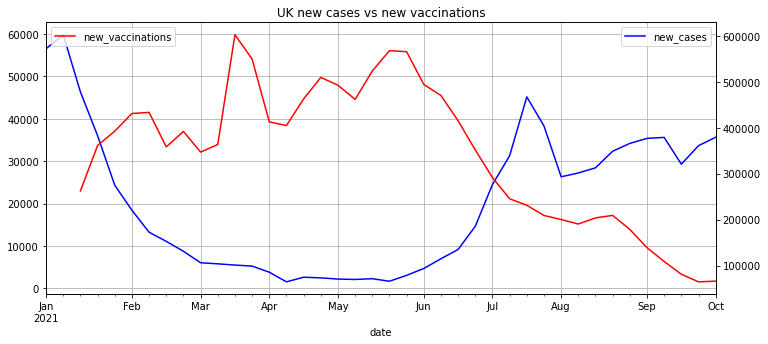

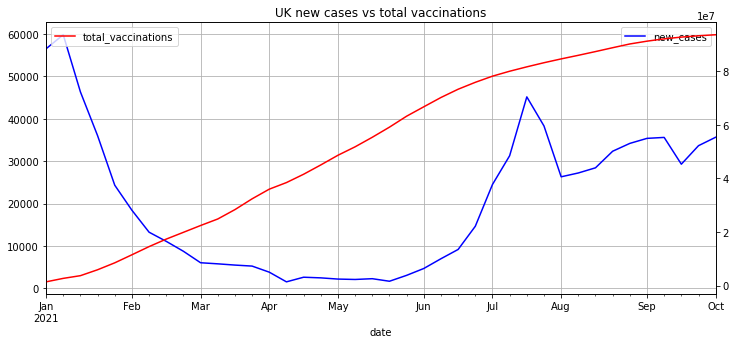

In [202]:
# UK
plt.figure(figsize=(12,5))
plt.title('UK total cases vs total vaccinations')
ax1 = dfUK.total_cases.plot(color='blue', grid=True, label='total_cases')
ax2 = dfUK.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

# Pearson r of UK total cases vs total vaccinations
overall_pearson_r = dfUK.corr().loc['total_cases','total_vaccinations']
print(f"Pandas computed Pearson r (total_cases/total_vaccinations): {overall_pearson_r}")


# UK total deaths vs total vaccinations

plt.figure(figsize=(12,5))
plt.title('UK total deaths vs total vaccinations')
ax1 = dfUK.total_deaths.plot(color='blue', grid=True, label='total_deaths')
ax2 = dfUK.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

# pearson r of UK total deaths vs total vaccinations
overall_pearson_r = dfUK.corr().loc['total_deaths','total_vaccinations']
print(f"Pandas computed Pearson r (total_deaths/total_vaccinations): {overall_pearson_r}")

# UK new cases vs new vaccinations
plt.figure(figsize=(12,5))
plt.title('UK new cases vs new vaccinations')
ax1 = dfUK.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfUK.new_vaccinations.plot(color='red', grid=True, secondary_y=True, label='new_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()


# UK new cases vs total vaccinations
plt.figure(figsize=(12,5))
plt.title('UK new cases vs total vaccinations')
ax1 = dfUK.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfUK.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

In [203]:
dfAU = df[df["location"]=="Australia"].resample('sm').mean()
# dfAU = df[df["location"]=="Australia"]

print(dfAU.shape, dfAU)

(19, 60)               total_cases    new_cases  new_cases_smoothed  total_deaths  \
date                                                                       
2020-12-31   28581.692308    16.076923           19.109923    909.000000   
2021-01-15   28760.750000     8.875000           10.259000    909.000000   
2021-01-31   28859.533333     5.933333            6.038133    909.000000   
2021-02-15   28933.615385     5.384615            5.033000    909.000000   
2021-02-28   29052.200000    10.666667            9.914200    909.000000   
2021-03-15   29220.125000    10.875000           10.446375    909.000000   
2021-03-31   29385.866667    11.000000           10.495200    909.200000   
2021-04-15   29628.866667    21.933333           19.771400    910.000000   
2021-04-30   29898.933333    11.066667           15.038000    910.000000   
2021-05-15   30027.937500     8.812500            7.883750    910.000000   
2021-05-31   30195.066667    11.200000           11.276133    910.000000   
202

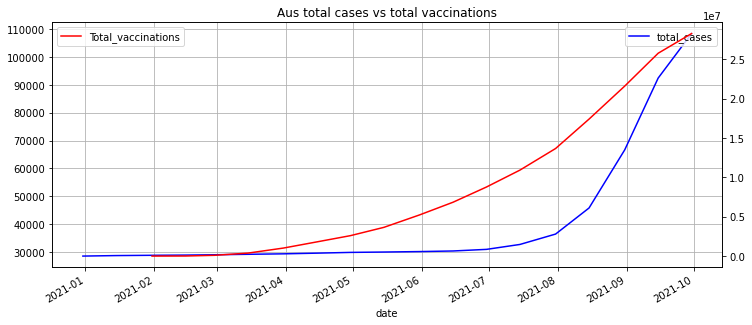

Pandas computed Pearson r (total_cases/total_vaccinations): 0.9000680267657194


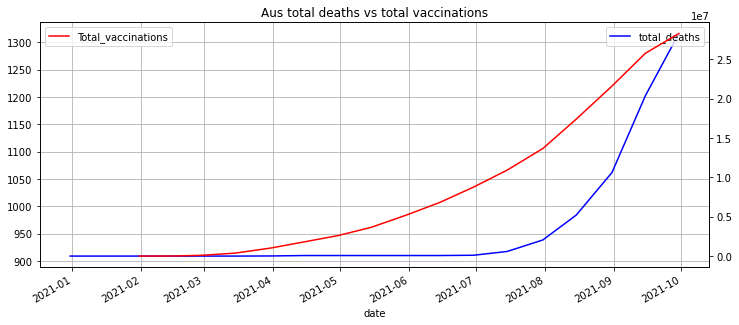

Pandas computed Pearson r (total_deaths/total_vaccinations): 0.8765044276067359


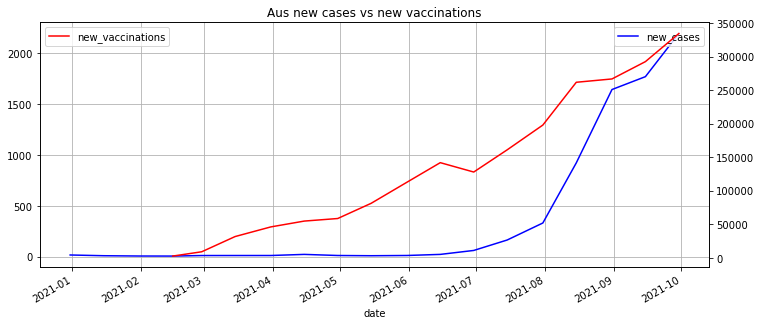

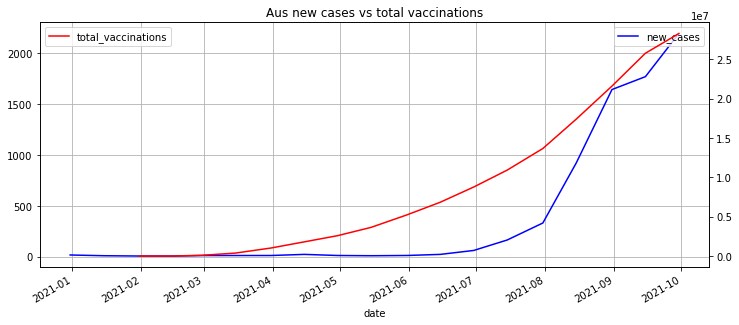

In [204]:
# Aus
plt.figure(figsize=(12,5))
plt.title('Aus total cases vs total vaccinations')
ax1 = dfAU.total_cases.plot(color='blue', grid=True, label='total_cases')
ax2 = dfAU.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

# Pearson r of UK total cases vs total vaccinations
overall_pearson_r = dfAU.corr().loc['total_cases','total_vaccinations']
print(f"Pandas computed Pearson r (total_cases/total_vaccinations): {overall_pearson_r}")


# Aus total deaths vs total vaccinations

plt.figure(figsize=(12,5))
plt.title('Aus total deaths vs total vaccinations')
ax1 = dfAU.total_deaths.plot(color='blue', grid=True, label='total_deaths')
ax2 = dfAU.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

# pearson r of UK total deaths vs total vaccinations
overall_pearson_r = dfAU.corr().loc['total_deaths','total_vaccinations']
print(f"Pandas computed Pearson r (total_deaths/total_vaccinations): {overall_pearson_r}")

# Aus new cases vs new vaccinations
plt.figure(figsize=(12,5))
plt.title('Aus new cases vs new vaccinations')
ax1 = dfAU.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfAU.new_vaccinations.plot(color='red', grid=True, secondary_y=True, label='new_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()


# Aus new cases vs total vaccinations
plt.figure(figsize=(12,5))
plt.title('Aus new cases vs total vaccinations')
ax1 = dfAU.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfAU.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

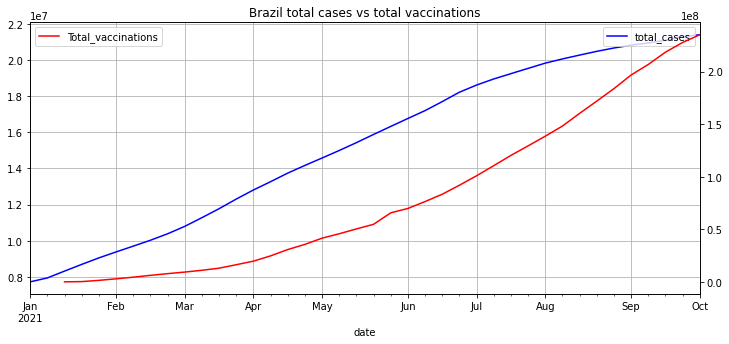

Pandas computed Pearson r (total_cases/total_vaccinations): 0.9314449583536577


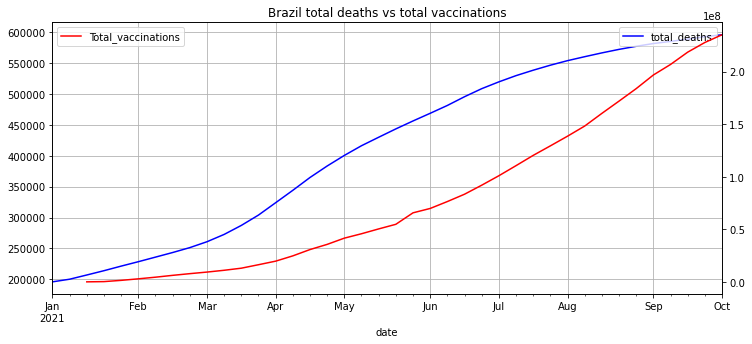

Pandas computed Pearson r (total_deaths/total_vaccinations): 0.9207997041668285


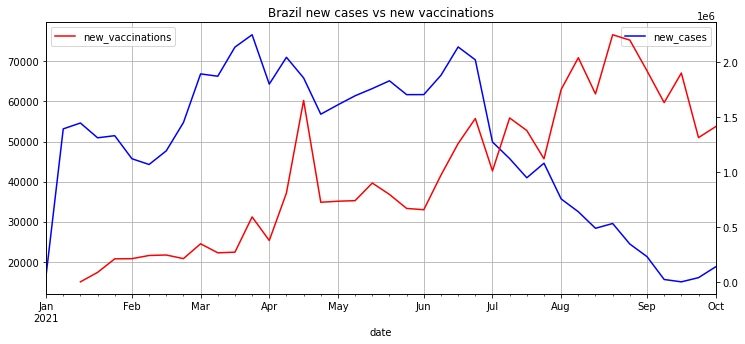

In [205]:
# BR
plt.figure(figsize=(12,5))
plt.title('Brazil total cases vs total vaccinations')
ax1 = dfBR.total_cases.plot(color='blue', grid=True, label='total_cases')
ax2 = dfBR.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

# Pearson r of UK total cases vs total vaccinations
overall_pearson_r = dfBR.corr().loc['total_cases','total_vaccinations']
print(f"Pandas computed Pearson r (total_cases/total_vaccinations): {overall_pearson_r}")


# Aus total deaths vs total vaccinations

plt.figure(figsize=(12,5))
plt.title('Brazil total deaths vs total vaccinations')
ax1 = dfBR.total_deaths.plot(color='blue', grid=True, label='total_deaths')
ax2 = dfBR.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='Total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

# pearson r of UK total deaths vs total vaccinations
overall_pearson_r = dfBR.corr().loc['total_deaths','total_vaccinations']
print(f"Pandas computed Pearson r (total_deaths/total_vaccinations): {overall_pearson_r}")

# Aus new cases vs new vaccinations
plt.figure(figsize=(12,5))
plt.title('Brazil new cases vs new vaccinations')
ax1 = dfBR.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfBR.new_vaccinations.plot(color='red', grid=True, secondary_y=True, label='new_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

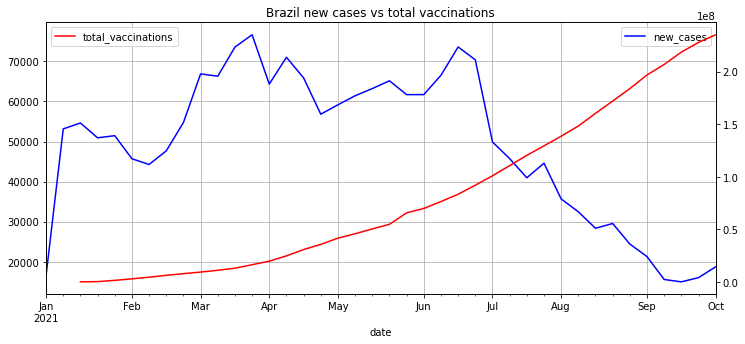

In [206]:
# Aus new cases vs total vaccinations
plt.figure(figsize=(12,5))
plt.title('Brazil new cases vs total vaccinations')
ax1 = dfBR.new_cases.plot(color='blue', grid=True, label='new_cases')
ax2 = dfBR.total_vaccinations.plot(color='red', grid=True, secondary_y=True, label='total_vaccinations')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#plt.legend(h1+h2, l1+l2, loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()
